In [1]:
from lsmulator import *
from workloads import *
import numpy as np
import matplotlib.pyplot as plt
from figure_grid import *
from bloom_assignments import *
from plot_helpers import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors
import matplotlib.cm as cm
import dill
import glob

In [2]:
def bloom_variations(prefix):
  return [dill.load(open(prefix+suffix, 'rb'))[3] for suffix in ['-mk.pkl', '-bl.pkl']]

In [3]:
filenames = [f[:-7] for f in glob.glob('asd/*-mk.pkl')]
filenames

['asd/results-DiscoverDecay(n~Pois([8,4,0]), θ~Beta(2,2), γ~Beta(2,1))-1000-50',
 'asd/results-DiscoverDecay(n~Pois([8,4,16]), θ~Beta(2,2), γ~Beta(2,1))-1000-50',
 'asd/results-DiscoverDecay(n~Pois([8,4,2]), θ~Beta(2,2), γ~Beta(100,1))-1000-50',
 'asd/results-DiscoverDecay(n~Pois([8,4,2]), θ~Beta(2,2), γ~Beta(2,1))-1000-50',
 'asd/results-EightyTwentyWorkload(K=5000,w=0.0)-1000-50',
 'asd/results-EightyTwentyWorkload(K=5000,w=0.25)-1000-50',
 'asd/results-EightyTwentyWorkload(K=5000,w=0.65)-1000-50',
 'asd/results-MultinomialWorkload(expon(1,))-1000-50',
 'asd/results-MultinomialWorkload(gamma(2,))-1000-50',
 'asd/results-MultinomialWorkload(uniform())-1000-50',
 'asd/results-PeriodicDecay(T=100, cusp=2, n~Pois([8,4,2]), θ~Beta(2,2), γ~Beta(100,1))-1000-50',
 'asd/results-PeriodicDecay(T=1000, cusp=2, n~Pois([8,4,2]), θ~Beta(2,2), γ~Beta(100,1))-1000-50',
 'asd/results-PeriodicDecay(T=1000, cusp=2, n~Pois([8,4,2]), θ~Beta(2,2), γ~Beta(2,1))-1000-50',
 'asd/results-RoundRobinWorkload(k=

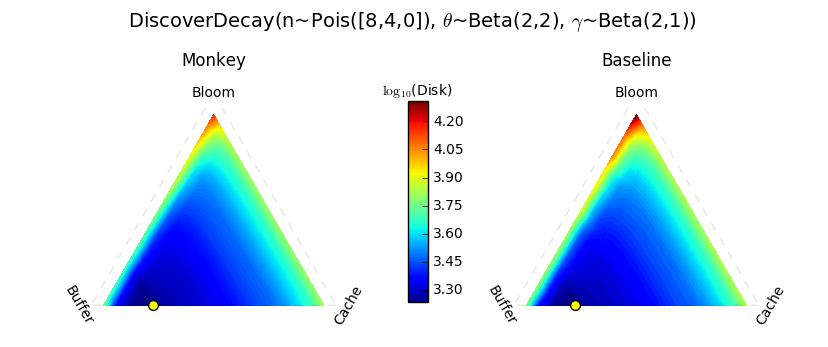

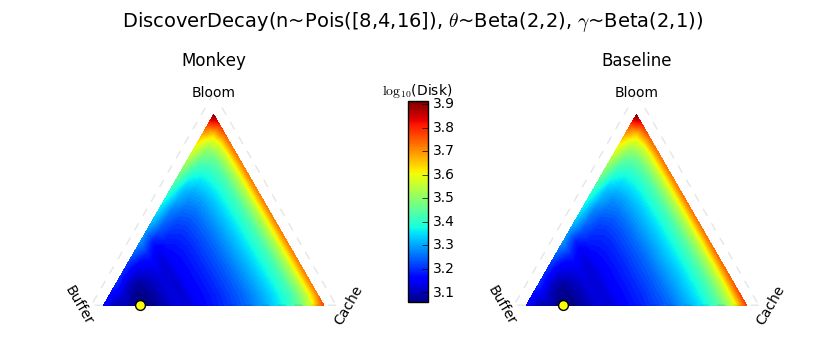

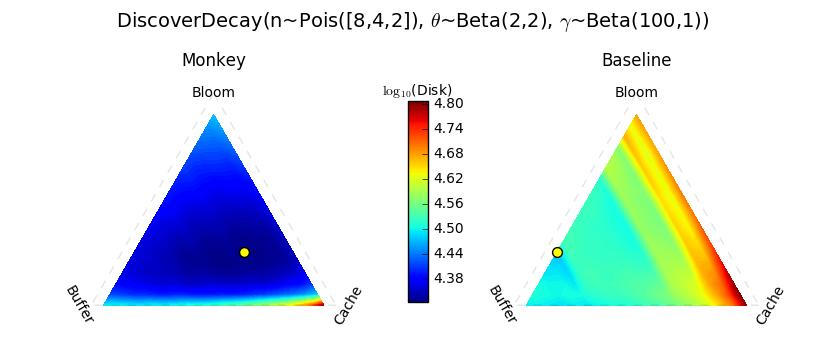

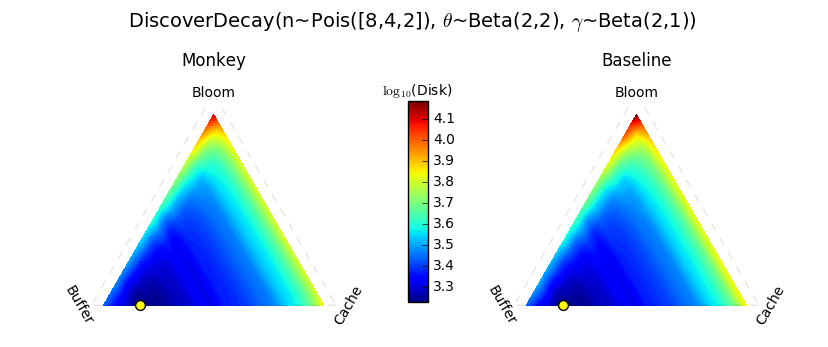

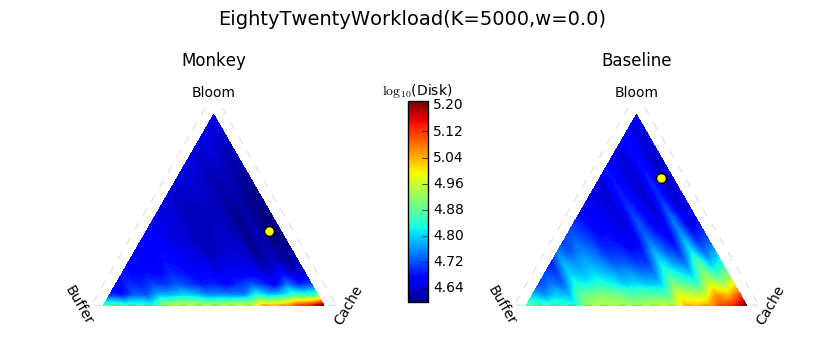

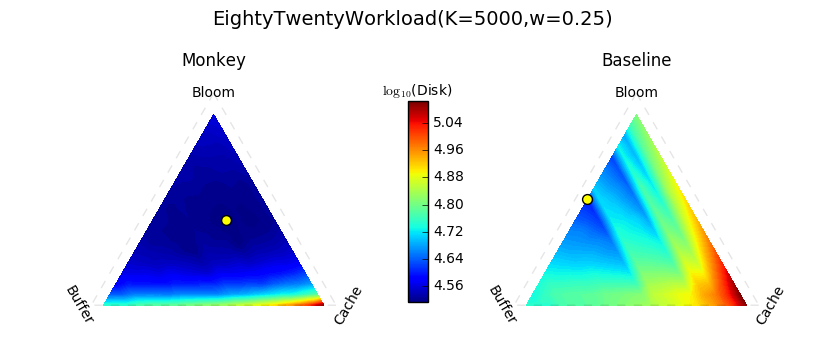

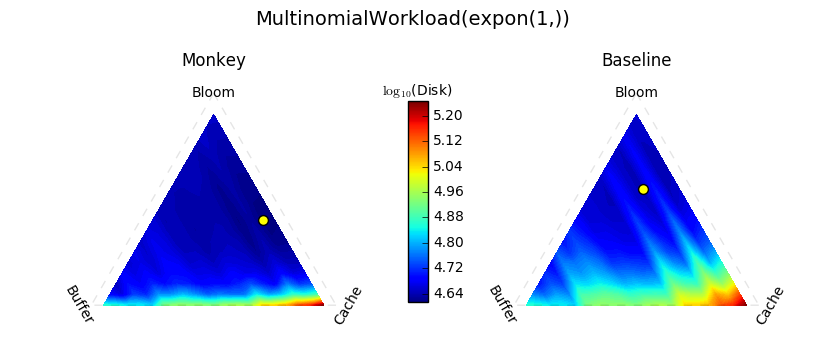

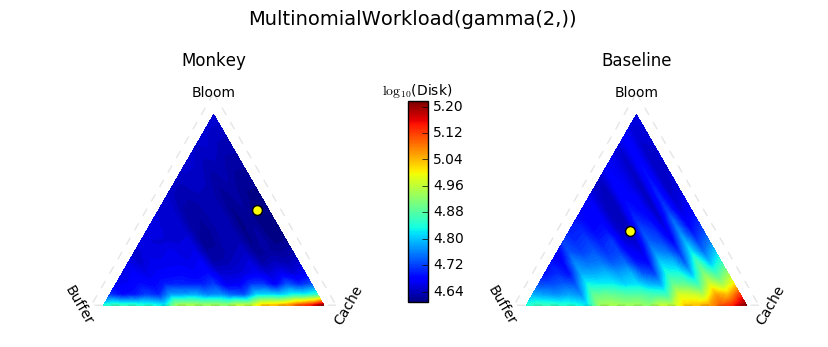

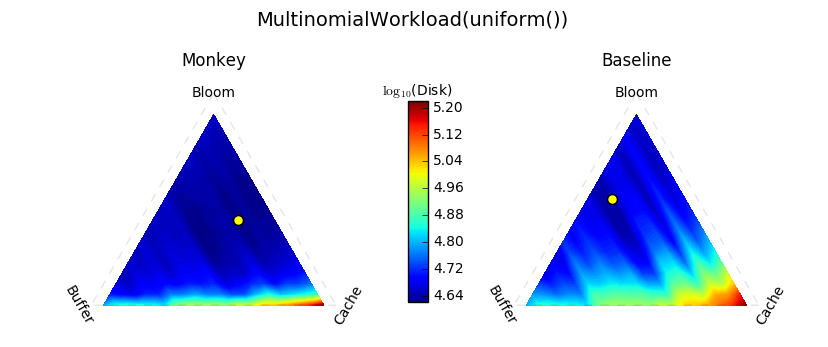

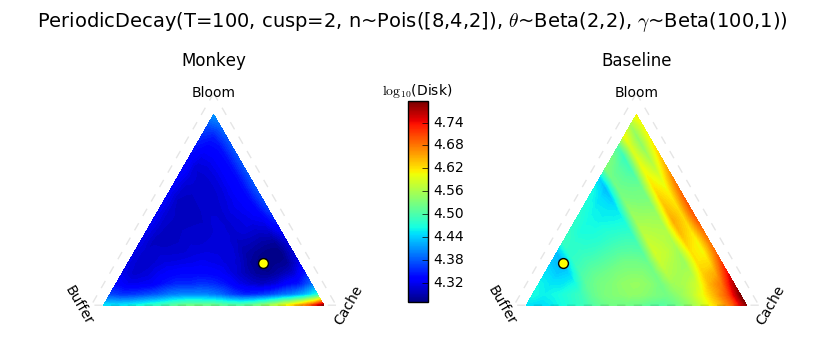

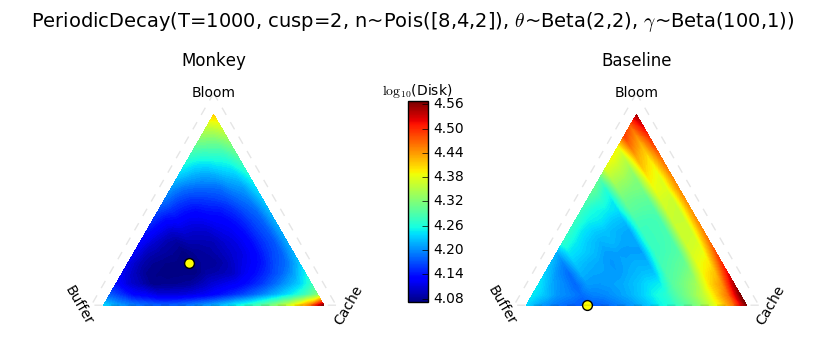

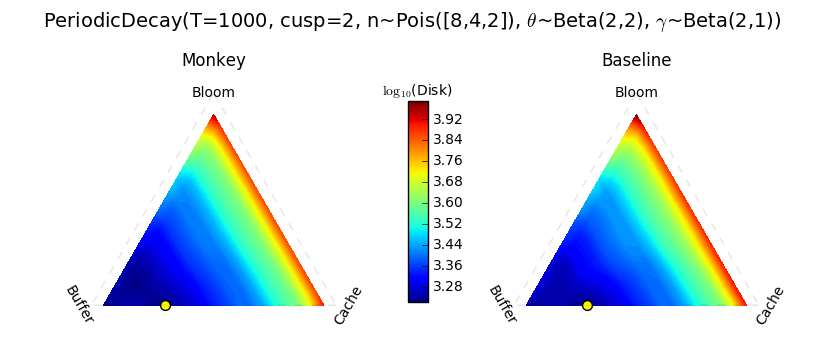

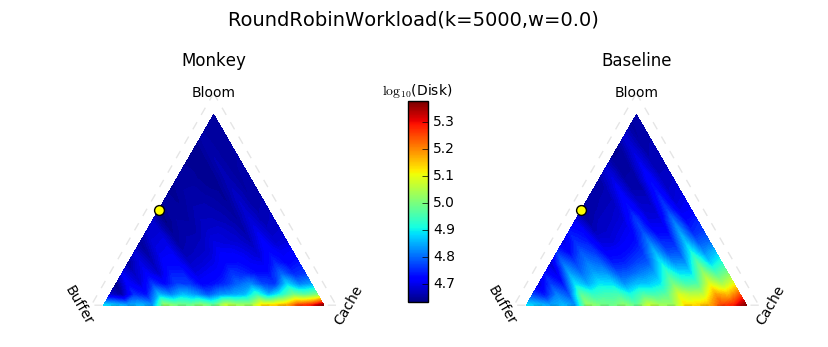

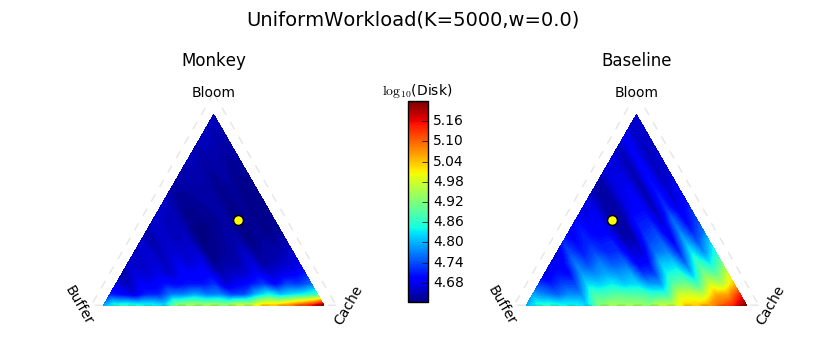

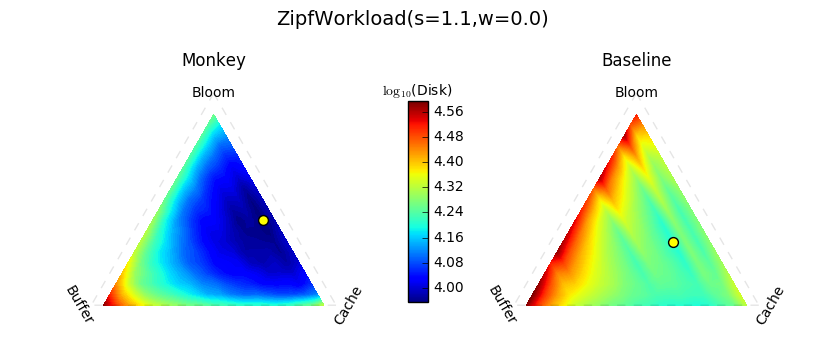

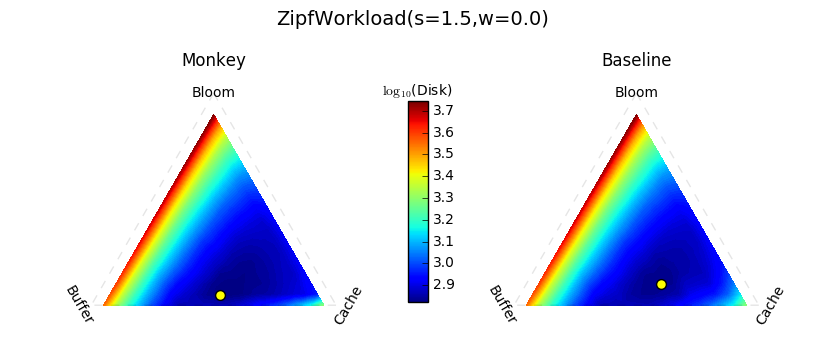

/Users/asross/code/cs265/simulations/plot_helpers.py:78: RuntimeWarning: divide by zero encountered in log10
  return np.array([(t.memtbl.size, t.cache.size, np.log10(t.disk_accesses)) for t in trees]).T
/Users/asross/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/colors.py:954: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/Users/asross/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


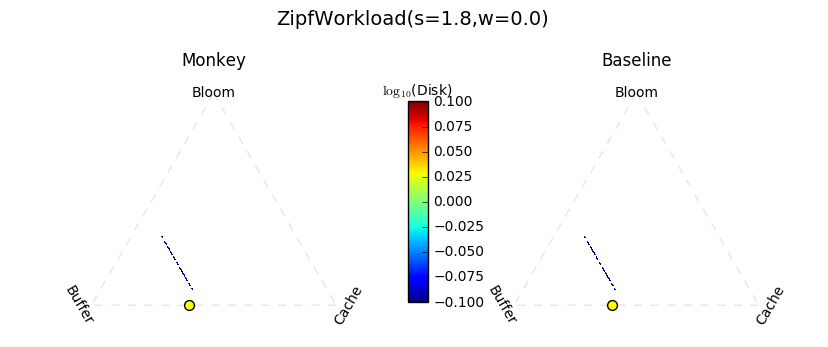

In [4]:
for f in filenames:
  try:
    mk, bl = bloom_variations(f)
  except:
    continue
  compare_cbm_contours(mk, bl, quiver=False)
  plt.suptitle(f[12:][:-8].replace('θ', '$\\theta$').replace('γ', '$\gamma$'), y=1.15, fontsize=14)
  plt.show()

In [6]:
n = 50000
k = 5000

workloads = [
  UniformWorkload(n_queries=n, k_classes=k),
  RoundRobinWorkload(n_queries=n, k_classes=k),
  ZipfWorkload(n_queries=n, zipf_param=1.1),
  ZipfWorkload(n_queries=n, zipf_param=1.5),
  ZipfWorkload(n_queries=n, zipf_param=1.8),
  EightyTwentyWorkload(n_queries=n, k_classes=k),
  EightyTwentyWorkload(n_queries=n, k_classes=k, update_fraction=0.25),
  EightyTwentyWorkload(n_queries=n, k_classes=k, update_fraction=0.65),
  MultinomialWorkload(n_queries=n, k_classes=k),
  MultinomialWorkload(n_queries=n, k_classes=k, dist=scipy.stats.gamma(2)),
  MultinomialWorkload(n_queries=n, k_classes=k, dist=scipy.stats.expon(1)),
  DiscoverDecayWorkload(n_queries=n),
  DiscoverDecayWorkload(n_queries=n, lookups=scipy.stats.poisson(8)),
  DiscoverDecayWorkload(n_queries=n, decay_rate=scipy.stats.beta(2, 1)),
  DiscoverDecayWorkload(n_queries=n, updates=scipy.stats.poisson(0), decay_rate=scipy.stats.beta(2, 1)),
  DiscoverDecayWorkload(n_queries=n, updates=scipy.stats.poisson(16), decay_rate=scipy.stats.beta(2, 1)),
  PeriodicDecayWorkload(n_queries=n, period=100),
  PeriodicDecayWorkload(n_queries=n, period=1000),
  #PeriodicDecayWorkload(n_queries=n, period=1000, decay_rate=scipy.stats.beta(2, 1))
]

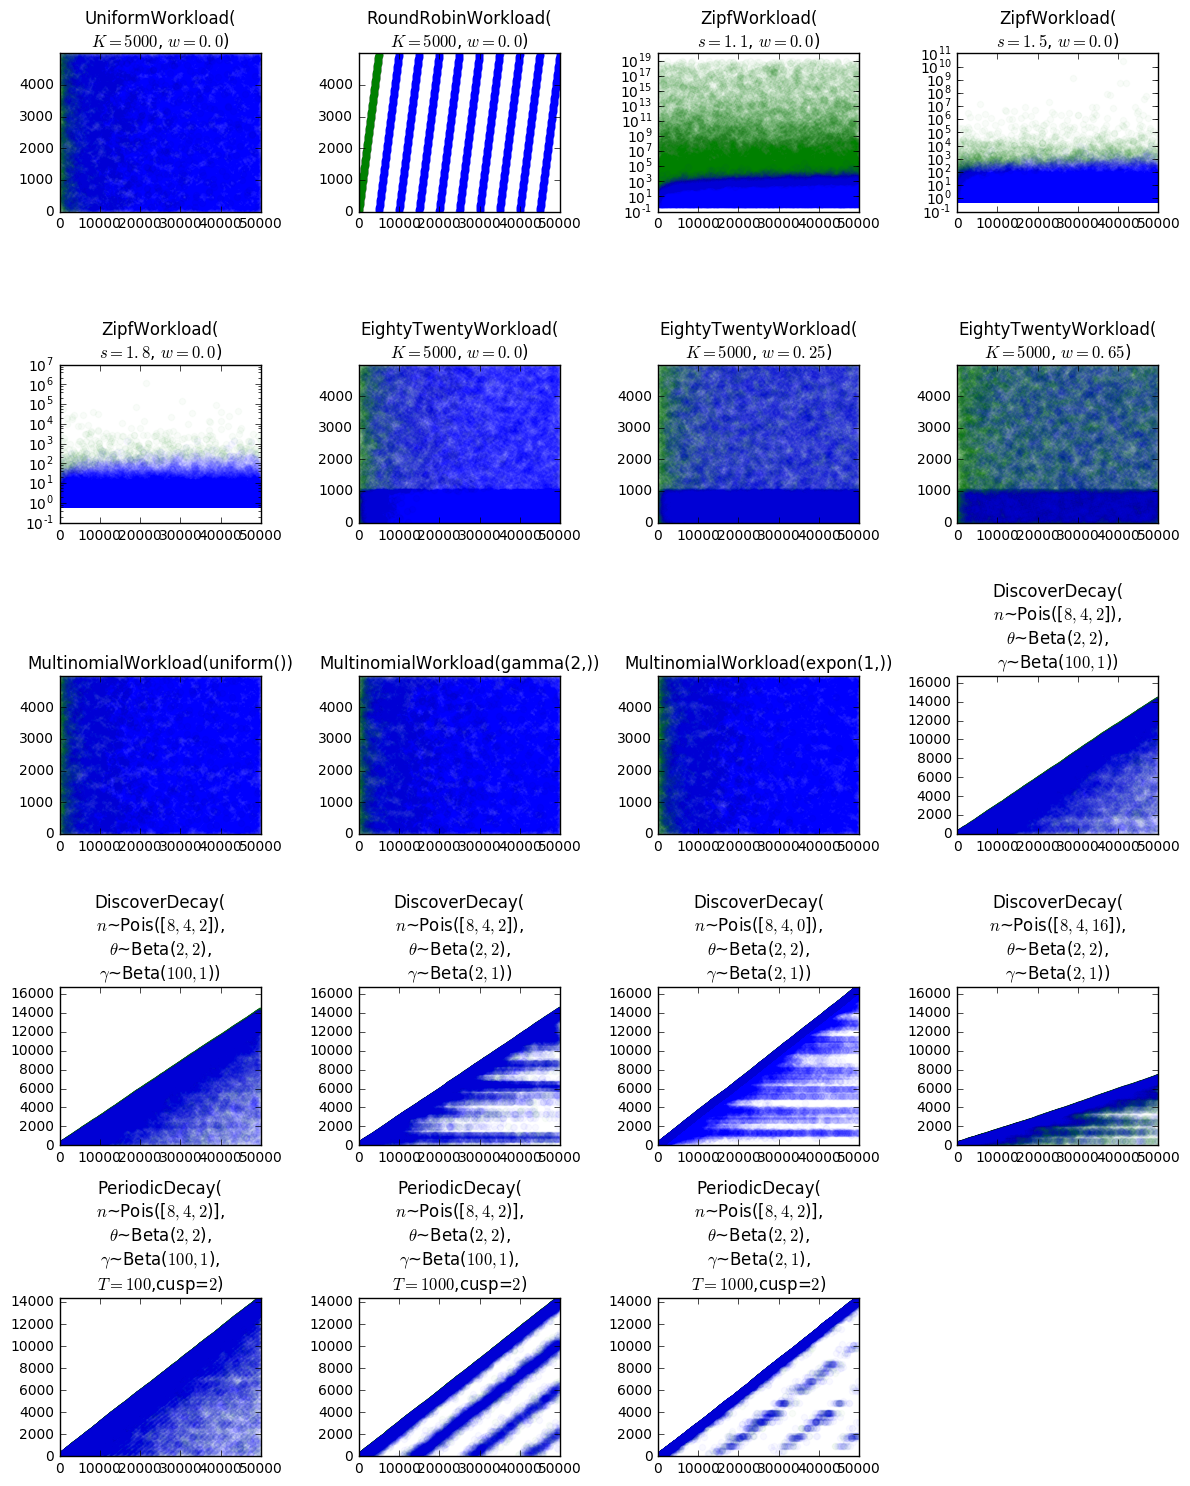

In [7]:
plot_workloads(workloads)